In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('/content/drive/My Drive/Codenation Projeto/9_semana/train.csv')
teste = pd.read_csv('/content/drive/My Drive/Codenation Projeto/9_semana/test.csv')

In [3]:
train.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
train.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0

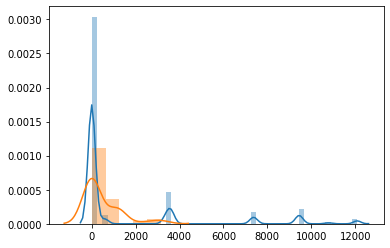

In [5]:
sns.distplot(train.isna().sum())
sns.distplot(teste.isna().sum())

In [7]:
train['IN_TREINEIRO'].value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

In [8]:
train.fillna(0,inplace=True)
teste.fillna(0,inplace=True)

In [ ]:
#labels = [TP_COR_RACA, TP_ST_CONCLUSAO]

In [34]:
colunas_retira = ['NU_ANO',	'CO_MUNICIPIO_RESIDENCIA',	'CO_UF_RESIDENCIA',	'NU_IDADE',	'TP_ESTADO_CIVIL',
                  'TP_NACIONALIDADE',	'CO_MUNICIPIO_NASCIMENTO',	'CO_UF_NASCIMENTO',
                  'TP_ANO_CONCLUIU',	'TP_ESCOLA',	'TP_ENSINO',
                  'CO_ESCOLA',	'CO_MUNICIPIO_ESC',	'CO_UF_ESC',	'TP_DEPENDENCIA_ADM_ESC',	'TP_LOCALIZACAO_ESC',
                  'TP_SIT_FUNC_ESC',	'IN_BAIXA_VISAO',	'IN_CEGUEIRA',	'IN_SURDEZ',	'IN_DEFICIENCIA_AUDITIVA',
                  'IN_SURDO_CEGUEIRA','IN_DEFICIENCIA_FISICA',	'IN_DEFICIENCIA_MENTAL',	'IN_DEFICIT_ATENCAO',	
                  'IN_DISLEXIA',	'IN_DISCALCULIA',	'IN_AUTISMO','IN_VISAO_MONOCULAR',	'IN_OUTRA_DEF',
                  'IN_GESTANTE',	'IN_LACTANTE',	'IN_IDOSO',
                  'IN_ESTUDA_CLASSE_HOSPITALAR',	'IN_SEM_RECURSO',	'IN_BRAILLE',	'IN_AMPLIADA_24',	'IN_AMPLIADA_18',	
                  'IN_LEDOR',	'IN_ACESSO'	,'IN_TRANSCRICAO',	'IN_LIBRAS'	,'IN_LEITURA_LABIAL',	'IN_MESA_CADEIRA_RODAS',	
                  'IN_MESA_CADEIRA_SEPARADA','IN_APOIO_PERNA'	,'IN_GUIA_INTERPRETE',	'IN_MACA'	,'IN_COMPUTADOR'	,'IN_CADEIRA_ESPECIAL',	
                  'IN_CADEIRA_CANHOTO',	'IN_CADEIRA_ACOLCHOADA',	'IN_PROVA_DEITADO',	'IN_MOBILIARIO_OBESO',
                  'IN_LAMINA_OVERLAY',	'IN_PROTETOR_AURICULAR',	'IN_MEDIDOR_GLICOSE',
                  'IN_MAQUINA_BRAILE',	'IN_SOROBAN',	'IN_MARCA_PASSO',	'IN_SONDA',	'IN_MEDICAMENTOS',
                  'IN_SALA_INDIVIDUAL','IN_SALA_ESPECIAL',	'IN_SALA_ACOMPANHANTE',	
                  'IN_MOBILIARIO_ESPECIFICO',	'IN_MATERIAL_ESPECIFICO',	'IN_NOME_SOCIAL',	'IN_CERTIFICADO',
                  'CO_UF_ENTIDADE_CERTIFICACAO',	'CO_MUNICIPIO_PROVA',	'CO_UF_PROVA',
                  'TP_LINGUA','Q029',	'Q030',	'Q031',	'Q032',	'Q033','Q035',	'Q036',	'Q037','Q041']

train1 = train.drop(columns = colunas_retira)

In [35]:
train1.corr()

,TP_COR_RACA,TP_ST_CONCLUSAO,IN_TREINEIRO,IN_SABATISTA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,Q034,Q038,Q039,Q040
TP_COR_RACA,1.000000,0.000738,0.009676,0.017208,-0.024471,-0.024471,-0.021861,-0.021861,-0.059398,-0.059901,-0.056907,-0.070239,0.000410,-0.055711,-0.057577,-0.061908,-0.062552,-0.071874,-0.064215,0.096772,0.031514,0.069298,0.046830,0.053556
TP_ST_CONCLUSAO,0.000738,1.000000,0.533983,-0.022877,0.054831,0.054831,0.053252,0.053252,0.025773,0.021589,0.028669,0.023736,0.057540,0.011429,0.001536,-0.003200,-0.000681,-0.016810,-0.001136,0.051853,0.031020,0.080592,0.019877,0.051951
IN_TREINEIRO,0.009676,0.533983,1.000000,0.003824,0.094692,0.094692,0.092454,0.092454,0.080915,0.078276,0.083731,0.078804,0.063190,0.080326,0.069545,0.064340,0.068862,0.045809,0.069119,0.033411,0.055265,0.018855,0.040348,0.005270
IN_SABATISTA,0.017208,-0.022877,0.003824,1.000000,0.001126,0.001126,0.002951,0.002951,-0.004421,0.000729,0.001392,-0.002457,0.012380,0.010404,0.011389,0.008506,0.013669,0.005998,0.010528,0.001809,-0.007157,-0.011170,-0.009671,-0.011202
TP_PRESENCA_CN,-0.024471,0.054831,0.094692,0.001126,1.000000,1.000000,0.943361,0.943361,0.950512,0.956152,0.913254,0.874764,0.591525,0.849426,0.814196,0.800356,0.818330,0.640851,0.821287,0.040856,0.012139,-0.016003,0.029835,-0.013657
TP_PRESENCA_CH,-0.024471,0.054831,0.094692,0.001126,1.000000,1.000000,0.943361,0.943361,0.950512,0.956152,0.913254,0.874764,0.591525,0.849426,0.814196,0.800356,0.818330,0.640851,0.821287,0.040856,0.012139,-0.016003,0.029835,-0.013657
TP_PRESENCA_LC,-0.021861,0.053252,0.092454,0.002951,0.943361,0.943361,1.000000,1.000000,0.910132,0.917000,0.964224,0.923641,0.624955,0.895790,0.858430,0.843652,0.862452,0.674349,0.865595,0.037927,0.015406,-0.019277,0.023827,-0.016834
TP_PRESENCA_MT,-0.021861,0.053252,0.092454,0.002951,0.943361,0.943361,1.000000,1.000000,0.910132,0.917000,0.964224,0.923641,0.624955,0.895790,0.858430,0.843652,0.862452,0.674349,0.865595,0.037927,0.015406,-0.019277,0.023827,-0.016834
NU_NOTA_CN,-0.059398,0.025773,0.080915,-0.004421,0.950512,0.950512,0.910132,0.910132,1.000000,0.969323,0.920917,0.907039,0.550588,0.864529,0.845978,0.837947,0.848201,0.706057,0.857810,0.018486,-0.009970,-0.067013,0.029247,-0.041939
NU_NOTA_CH,-0.059901,0.021589,0.078276,0.000729,0.956152,0.956152,0.917000,0.917000,0.969323,1.000000,0.934704,0.903608,0.549271,0.877637,0.857895,0.850698,0.860898,0.719970,0.871199,0.018995,-0.008268,-0.068033,0.020315,-0.044737


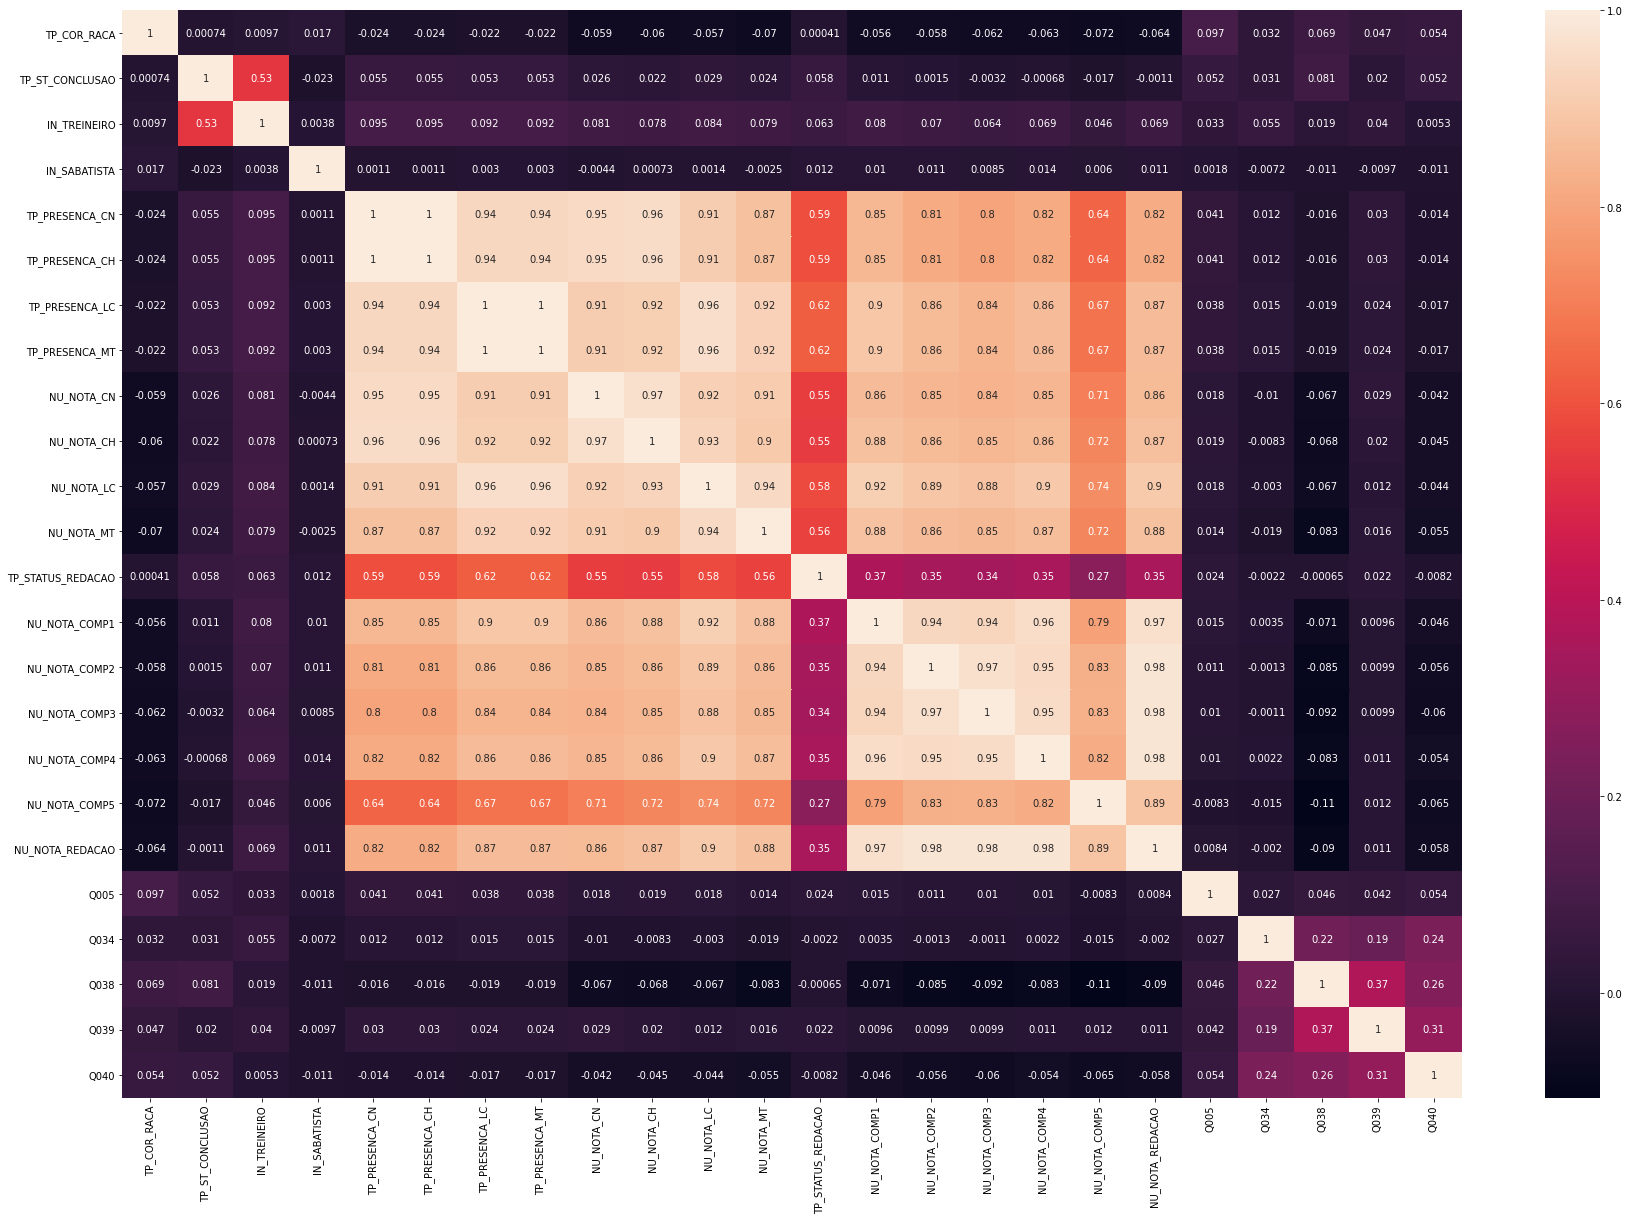

In [36]:
plt.figure(figsize=(30,20))
corr = train1.corr()
sns.heatmap(corr,annot=True)

In [49]:
labels2 = ['TP_COR_RACA',	'TP_ST_CONCLUSAO'		,'IN_SABATISTA'	,'TP_PRESENCA_CN',	
           'TP_PRESENCA_CH',	'TP_PRESENCA_LC',	'TP_PRESENCA_MT',	'NU_NOTA_CN',	'NU_NOTA_CH',	'NU_NOTA_LC',	
           	'TP_STATUS_REDACAO',	'NU_NOTA_COMP1',	
           'NU_NOTA_COMP2',	'NU_NOTA_COMP3'	,'NU_NOTA_COMP4',	'NU_NOTA_COMP5',	'NU_NOTA_REDACAO']

In [50]:
train[labels2].head()

,TP_COR_RACA,TP_ST_CONCLUSAO,IN_SABATISTA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,1,1,0,1,1,1,1,436.3,495.4,581.2,1.0,120.0,120.0,120.0,80.0,80.0,520.0
1,3,2,0,1,1,1,1,474.5,544.1,599.0,1.0,140.0,120.0,120.0,120.0,80.0,580.0
2,3,3,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
X_train = train[labels2]
Y_train = train['IN_TREINEIRO']
X_teste = teste[labels2]

In [52]:
from sklearn.preprocessing import StandardScaler, Normalizer

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_teste = sc.transform(X_teste)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
predictions = logmodel.predict(X_teste)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
scores_log = cross_val_score(logmodel, X_train, Y_train,
                            scoring='accuracy', cv=5)
scores_log.mean().round(5)

0.86067

In [58]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [59]:
dt_pred = dt_model.predict(X_teste)

In [61]:
scores_dt = cross_val_score(dt_model, X_train, Y_train,
                            scoring='accuracy', cv=5)
scores_dt.mean().round(5)

0.94647

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=500)
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
rf_pre=rf.predict(X_teste)

In [65]:
scores_rf = cross_val_score(rf, X_train, Y_train,
                            scoring='accuracy', cv=5)
scores_rf.mean().round(5)

0.96009

In [66]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(n_estimators=1000)
xgboost.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [67]:
xg_pred = xgboost.predict(X_teste)

In [68]:
scores_xg = cross_val_score(xgboost, X_train, Y_train,
                            scoring='accuracy', cv=5)
scores_xg.mean().round(5)

0.95557

In [70]:
answer = pd.DataFrame()
answer['NU_INSCRICAO'] = teste['NU_INSCRICAO']
answer['IN_TREINEIRO'] = rf_pre

answer.to_csv('/content/drive/My Drive/Codenation Projeto/9_semana/answer.csv', index=False,float_format= '%.1f')